## Machine Learning - Supervised - Binary Classification - Decision Tree and Random Forest using Pipelines

In [4]:
## importing necessary python libraries
import numpy as np # numerical python library
import pandas as pd # create dataframes and perform operations
import string # perform string operations
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # beautify the charts and graphs
sns.set_theme(style='darkgrid',palette='Set2')

In [14]:
##this is so that we can have charts displayed between these block of codes on this notebook
%matplotlib inline 

In [18]:
# lets import the dataset and load it into a dataframe
df = pd.read_csv(r"C:\Users\gmraj\Documents\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\Credit_Card_Fraud.csv")

In [20]:
## Exploratory Data Analysis
## Data Cleansing / Wrangling / Feature Engineering

In [26]:
## this dataset is moderate sized with > 500K indexes and over 20 feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

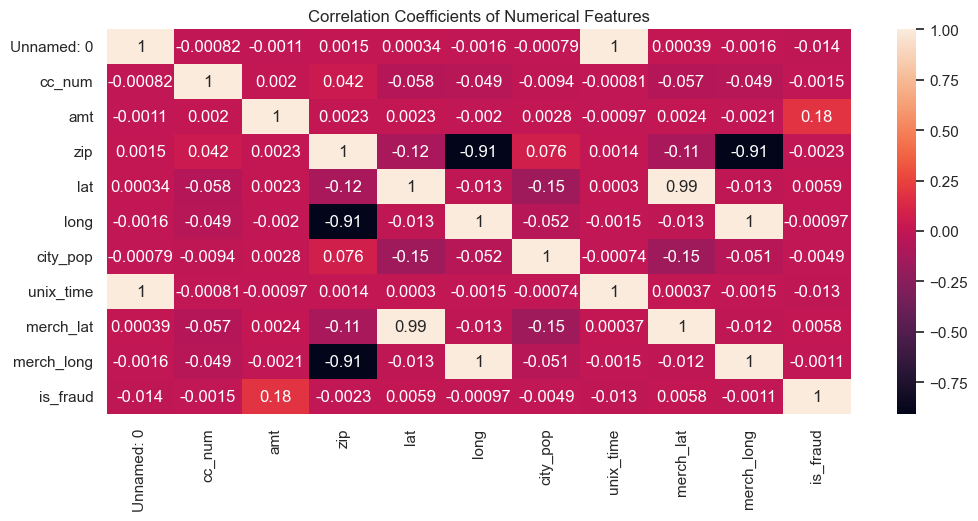

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Coefficients of Numerical Features')
plt.show()

In [36]:
## So far we have observed that only 'amt' has noticable positive correlation with 'is_fraud' of the coefficient 0.18
## Since many columns are Categorical, its possibe that they might give more truth later once we encode them

In [38]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


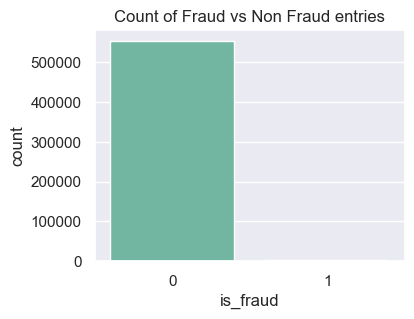

In [46]:
plt.figure(figsize=(4,3))
sns.countplot(x='is_fraud',data=df)
plt.title('Count of Fraud vs Non Fraud entries')
plt.show()

In [58]:
## Lets check the overall count of fraud vs non fraud entries
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [62]:
## Fraud entries account for 0.3860% of the overall entries
df['is_fraud'].describe()

count    555719.000000
mean          0.003860
std           0.062008
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_fraud, dtype: float64

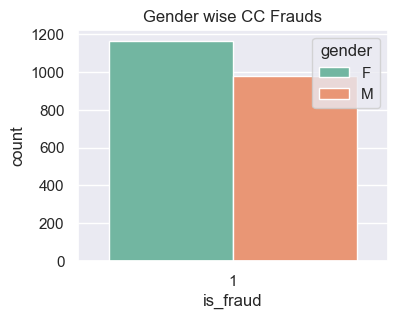

In [76]:
plt.figure(figsize=(4,3))
sns.countplot(x='is_fraud',data=df[df['is_fraud']==1],hue='gender')
plt.title('Gender wise CC Frauds')
plt.show()

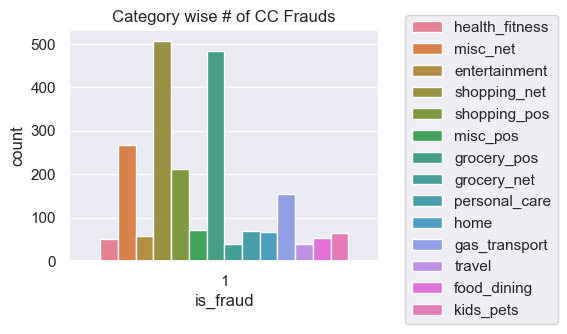

In [92]:
plt.figure(figsize=(4,3))
sns.countplot(x='is_fraud',data=df[df['is_fraud']==1],hue='category')
plt.legend(loc='best',bbox_to_anchor=[1,1,0.6,0.1])
plt.title('Category wise # of CC Frauds')
plt.show()

In [94]:
## Since we observed that 'enterntainment' and 'misc_pos' have significantly higher number of CC Frauds, lets check 
## the average ticket size of the transactions for each of these categories

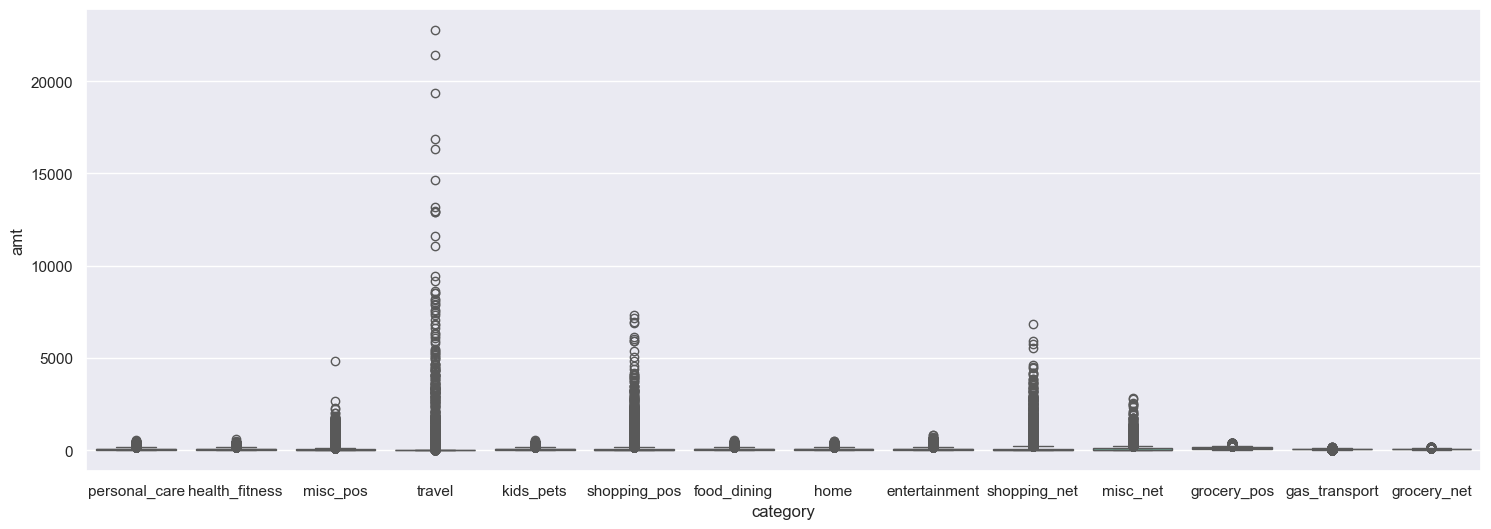

In [105]:
plt.figure(figsize=(18,6))
sns.boxplot(x='category',y='amt',data=df)
plt.show()

### Since the above Box Plot is not comprehendable lets find out the mean of the amt column and then re-plot based on the adjusted amt values

In [111]:
df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

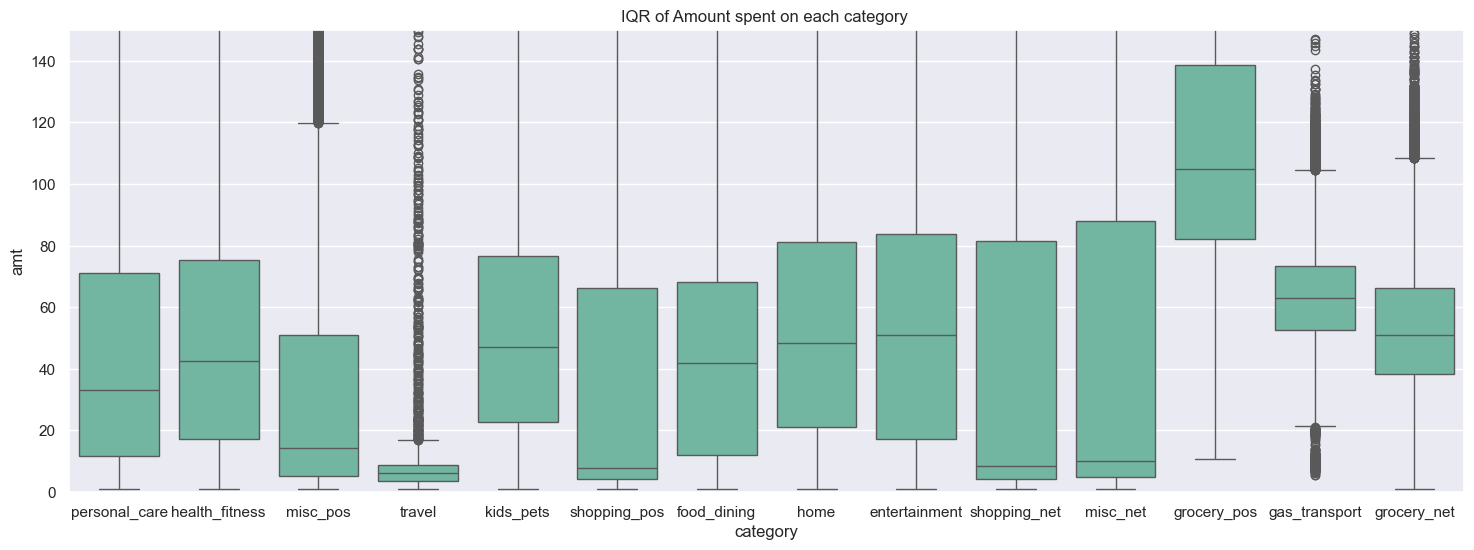

In [109]:
plt.figure(figsize=(18,6))
sns.boxplot(x='category',y='amt',data=df)
plt.ylim(0,150)
plt.title('IQR of Amount spent on each category')
plt.show()

In [117]:
## Creating a new dataframe to store only those index where the is_fraud value is 1
df_fraud = df[df['is_fraud']==1]

In [121]:
df_fraud['amt'].describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

### We can oberve that for fraud transactions the mean ticket size of the transaction is significantly higher (69 vs 528)

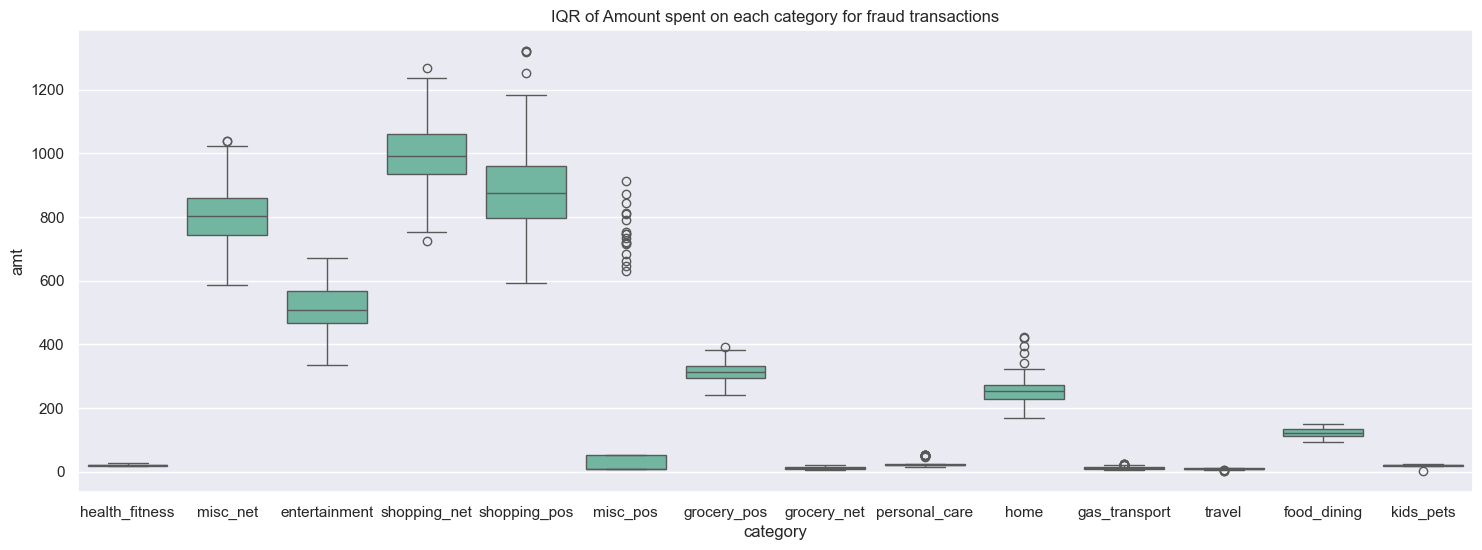

In [125]:
plt.figure(figsize=(18,6))
sns.boxplot(x='category',y='amt',data=df_fraud)
# plt.ylim(0,150)
plt.title('IQR of Amount spent on each category for fraud transactions')
plt.show()

### We observe that for enterntainment avg ticket size is ~50 usd and for misc. net its ~$15
### Whereas for same categories for fraud transactions the avg ticket size is ~500 usd (10x) and ~800 usd (53x)

In [133]:
## Lets now check if Age is a factor in CC Frauds
## We will convert the existing dob column to pandas datatime 
df['dob'] = pd.to_datetime(df['dob'],dayfirst=True)

In [141]:
## Creating a new Age column based on difference between current year minus year of birth
df['age']=2025-df['dob'].dt.year

In [145]:
## Average age of the customers is 51.6 yrs
df['age'].describe()

count    555719.000000
mean         51.636237
std          17.418528
min          20.000000
25%          38.000000
50%          50.000000
75%          63.000000
max         101.000000
Name: age, dtype: float64

### Average age of the customers who have been victim of the fraud is 53.72 yrs

In [151]:
df[df['is_fraud']==1]['age'].describe()

count    2145.000000
mean       53.738462
std        17.618287
min        23.000000
25%        39.000000
50%        53.000000
75%        66.000000
max       101.000000
Name: age, dtype: float64

In [193]:
## We are creating a new dataframe for only fraud victim customers. We will only include their age and fraud amount
df_age_fraud = df[df['is_fraud']==1][['age','amt']].sort_values(by='age',ascending=True)

<Figure size 600x400 with 0 Axes>

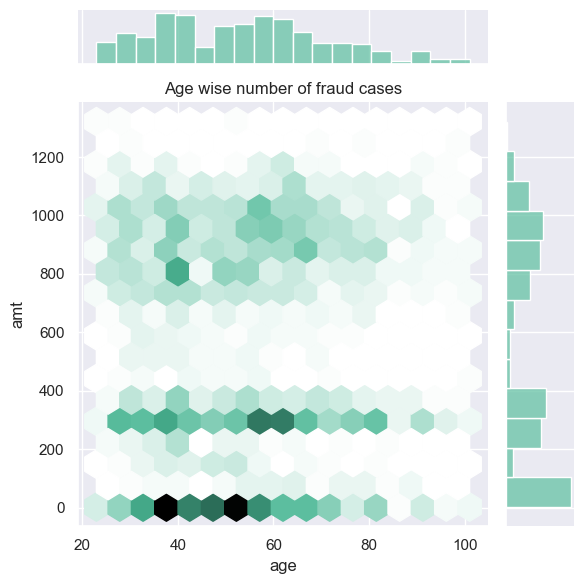

In [205]:
plt.figure(figsize=(6,4))
sns.jointplot(x='age',y='amt',data=df_age_fraud,kind='hex')
plt.title('Age wise number of fraud cases')
plt.tight_layout()
plt.show()

### Data is widely dispersed but we can clearly observe that maximum number of frauds are happening to customers aged between 35 and 50

In [250]:
## Lets create a cohort of age so that we can better understand which age group is more susceptible to CC fraud attempts
def my_age(x):
    if (x>=20) & (x<30):
        return '20-30'
    elif (x>=30) & (x<40):
        return '30-40'
    elif (x>=40) & (x<50):
        return '40-50'
    elif x<20:
        return 'under 20'
    else:
        return 'above 50'

In [252]:
df_age_fraud['age_bracket'] = df_age_fraud['age'].apply(my_age)

In [268]:
df_age_fraud.groupby('age_bracket')['amt'].describe()['mean']

age_bracket
20-30       608.721242
30-40       515.553701
40-50       457.945104
above 50    545.139908
Name: mean, dtype: float64

### We can see that age 20-30 has the highest mean of fraud amount of $608 across all other categories.
### It makes sense as this group is more likely to spend on enterntainment category which as 10x frauds amount wise

In [294]:
## Lets check if there is any correlation between frauds and the job of a customer
df_job_faud = df[df['is_fraud']==1][['gender','job','amt']]

In [305]:
df_job_faud['job'].nunique()

177

### We have a total of 177 unique job titles which add upto a total of 2145 fraud cases

In [323]:
df_job_fraud_mean = df_job_faud.groupby('job').describe()['amt']['mean']

In [327]:
df_job_fraud_mean = pd.DataFrame(df_job_fraud_mean)

In [337]:
df_job_fraud_mean.sort_values(by='mean',ascending=False).head(10)

,mean
job,
Health promotion specialist,920.257778
TEFL teacher,859.882000
Herbalist,855.476250
"Administrator, local government",820.295000
Commissioning editor,804.376667
Call centre manager,798.020000
Surgeon,787.510000
Public relations officer,785.336667
"Pilot, airline",769.620000


### These are the top 5 job titles which have highest mean of fraudulent amount out of a total of 177 job titles

In [341]:
df_job_fraud_mean.sort_values(by='mean',ascending=True).head(10)

,mean
job,
"Designer, furniture",168.992000
Podiatrist,189.760769
Retail banker,200.414000
Film/video editor,222.361250
Planning and development surveyor,246.201429
"Therapist, music",248.223750
"Programmer, multimedia",252.702000
"Investment banker, operational",256.092857
Radio producer,258.847778


### These are the top 5 job titles which have lowest mean of fraudulent amount out of a total of 177 job titles

In [352]:
## Lets check if there is any pattern that can be observed based on the day of the fraudelent transactons

In [360]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

C:\Users\gmraj\AppData\Local\Temp\ipykernel_26356\2976588353.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [366]:
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()

In [370]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,trans_day
0,0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,57,Sunday
1,1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,35,Sunday
2,2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,55,Sunday


In [374]:
df_day_fraud = df[df['is_fraud']==1][['trans_day']]

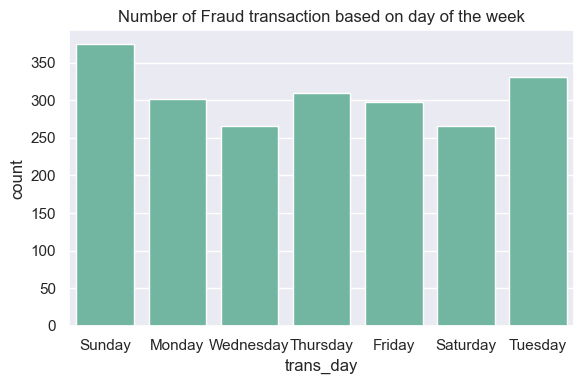

In [388]:
plt.figure(figsize=(6,4))
sns.countplot(x='trans_day',data=df_day_fraud)
plt.title('Number of Fraud transaction based on day of the week')
plt.tight_layout()
plt.show()

### Now lets go ahead and Feature Engineer the data so that its ready to be fit into a model

In [401]:
## Encoding the categorical columns into numerical columns
category = pd.get_dummies(df['category'],drop_first=True,dtype='float')
job = pd.get_dummies(df['job'],drop_first=True,dtype='float')
trans_day = pd.get_dummies(df['trans_day'],drop_first=True,dtype='float')
gender = pd.get_dummies(df['gender'],drop_first=True,dtype='float')

In [423]:
df.drop(['trans_date_trans_time','cc_num','merchant','category','street','first','last','gender','street','city','state','job','dob','trans_num','unix_time','trans_day'],axis=1,inplace=True)

In [427]:
df = pd.concat([df,category,job,trans_day,gender],axis=1)

In [442]:
## Dropping first unnamed column
df = df.iloc[:, 1:] 

In [444]:
df.head(3)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,food_dining,...,Web designer,Wellsite geologist,Writer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,M
0,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,0,57,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,0,35,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,0,55,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [448]:
X = df.drop('is_fraud',axis=1)

In [456]:
y = df['is_fraud']

## Decision Tree implementation

In [459]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [463]:
pipe_dec_tree = Pipeline([
    ('scaler',StandardScaler()),
    ('dec_tree',DecisionTreeClassifier(criterion='gini',splitter='best'))
])

In [465]:
pipe_dec_tree.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dec_tree', DecisionTreeClassifier())])

In [467]:
predict_dec_tree = pipe_dec_tree.predict(X_test)

In [469]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [471]:
print(classification_report(y_test,predict_dec_tree))
print('\n')
print(confusion_matrix(y_test,predict_dec_tree))
print('\n')
print(accuracy_score(y_test,predict_dec_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138407
           1       0.64      0.66      0.65       523

    accuracy                           1.00    138930
   macro avg       0.82      0.83      0.83    138930
weighted avg       1.00      1.00      1.00    138930



[[138212    195]
 [   176    347]]


0.9973295904412294


### Decison Tree Model predicted the outcomes with an accuracy of 99.73%

## Now lets run the same model on Random Forest estimator 

In [478]:
from sklearn.ensemble import RandomForestClassifier

In [480]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [482]:
pipe_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('ran_for',RandomForestClassifier(criterion='gini',n_estimators=100))
])

In [484]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ran_for', RandomForestClassifier())])

In [487]:
predict_rf = pipe_rf.predict(X_test)

In [488]:
print(classification_report(y_test,predict_rf))
print('\n')
print(confusion_matrix(y_test,predict_rf))
print('\n')
print(accuracy_score(y_test,predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138406
           1       0.94      0.49      0.65       524

    accuracy                           1.00    138930
   macro avg       0.97      0.75      0.82    138930
weighted avg       1.00      1.00      1.00    138930



[[138389     17]
 [   266    258]]


0.9979630029511265


### Decison Tree Model predicted the outcomes with an accuracy of 99.79%

In [ ]:
## Thank You